In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0,0.5,'Magnitud')

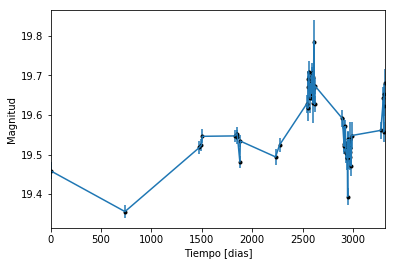

In [2]:
data = np.genfromtxt('LC_22275_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

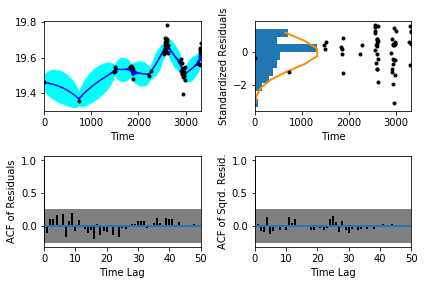

In [5]:
sample.assess_fit()

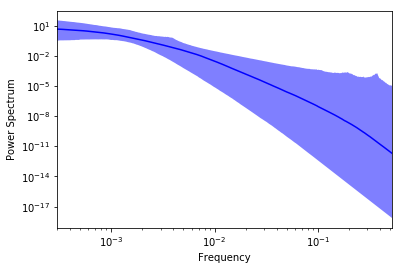

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.000376389,0.052873,'Medida del nivel de ruido')

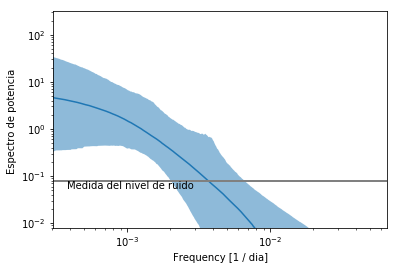

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))

Text(0.5,1,'Prediccion , valor esperado ')

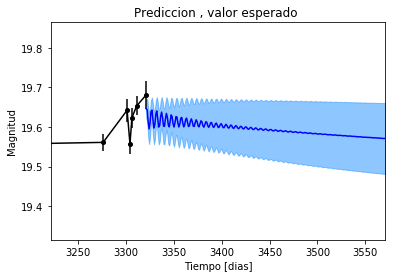

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado ')

Text(0.5,1,'Prediccion, Caminos simulados')

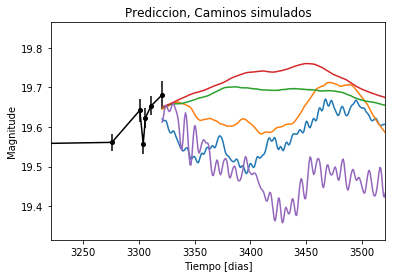

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


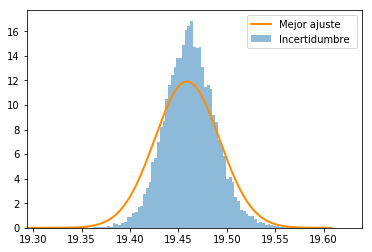

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')

Text(0.5,1,'Interpolacion, camino simulado')

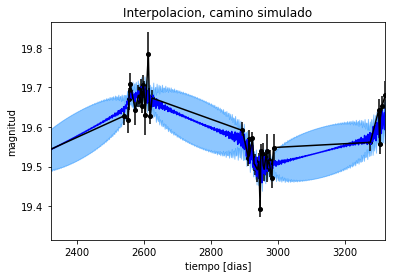

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

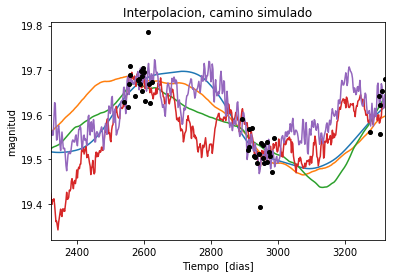

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 2194.0099356
Median: 0.00779546036126
Standard deviation: 0.172641565076
68% credibility interval: [ 0.00085699  0.12461124]
95% credibility interval: [  3.59845424e-04   7.04051171e-01]
99% credibility interval: [  3.13192368e-04   9.50647649e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 1429.72481218
Median: 0.00230171777101
Standard deviation: 0.0696537121434
68% credibility interval: [ 0.00053033  0.02066631]
95% credibility interval: [ 0.00032916  0.1982071 ]
99% credibility interval: [  3.09968661e-04   5.02619781e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 239.60092744
Median: 0.0352410809927
Standard d

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1624.08676547
Median: 116.477558848
Standard deviation: 1.59415151933
68% credibility interval: [ 114.81567351  117.57443935]
95% credibility interval: [ 112.47962055  119.018077  ]
99% credibility interval: [ 110.5562373   120.25712555]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 461.676710833
Median: 0.816436616576
Standard deviation: 2.10311372196
68% credibility interval: [ 0.06762533  3.86916656]
95% credibility interval: [ 0.01492244  6.86275519]
99% credibility interval: [ 0.01021518  9.94569745]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 985.285654199
Median: 0.585556221551
Standard deviation: 8.91336554626
68% credibility interval: [ 0.01948393  9.10503994]
95% credibility interval: [  1.03851741e-0

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 16326.3493518
Median: 5.23097160121e-47
Standard deviation: 2.42890047015e+27
68% credibility interval: [  1.25943180e-82   8.84341793e-18]
95% credibility interval: [  3.31515157e-113   2.20376378e+002]
99% credibility interval: [  7.02050302e-131   1.69321427e+026]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2082.63868116
Median: 19.5238988772
Standard deviation: 0.0571495900269
68% credibility interval: [ 19.47521327  19.56744412]
95% credibility interval: [ 19.40911552  19.6354152 ]
99% credibility interval: [ 19.34184559  19.73060688]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 634.206757699
Median: 0.0170120525622
Standard deviation: 0.25233392349
68% credibility interval: [ 0.          0.39657282]
95% credibility interval: [ 0.          0.88464597]
99% credibility interval: [ 0.          1.00983886]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 634.206757699
Median: 0.0170120525622
Standard deviation: 0.25233392349
68% credibility interval: [ 0.          0.39657282]
95% credibility interval: [ 0.          0.88464597]
99% credibility interval: [ 0.          1.00983886]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 418.168570911
Median: 0.0
Standard deviation: 0.000657910386291
68% cred

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1624.08676547
Median: 116.477558848
Standard deviation: 1.59415151933
68% credibility interval: [ 114.81567351  117.57443935]
95% credibility interval: [ 112.47962055  119.018077  ]
99% credibility interval: [ 110.5562373   120.25712555]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 3078.55813926
Median: 0.0109022055719
Standard deviation: 0.0173371980884
68% credibility interval: [ 0.00621811  0.021455  ]
95% credibility interval: [ 0.00404725  0.05674344]
99% credibility interval: [ 0.0031467   0.10101265]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 992.543054688
Median: 1.464090229
Standard deviation: 0.229441567534
68% credibility interval: [ 1.24030304  1.70716804]
95% credibility interval: [ 1.00975099  1.90552616]
99% credibility interval: [ 0.88038426  1.97777   ]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 553.82646198
Median: 0.000143621140682
Standard deviation: 0.136908494622
68% credibility interval: [  1.61995427e-06   1.16622803e-02]
95% credibility interval: [  1.03622748e-08   3.52197391e-01]
99% credibility interval: [  1.07629588e-28   9.55007545e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 2194.0099356
Median: (-0.0489803220046-4.25695609754j)
Standard deviation: 1.9210269465
68% credibility interval: [-0.78295554+0.j         -0.00538461-3.81897321j]
95% credibility interval: [ -4.42368397e+00+0.j          -2.26097548e-03-0.00656726j]
99% credibility interval: [ -5.97309534e+00+0.j          -1.96784568e-03-0.45349783j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 1429.72481218
Median: (-0.0144621192801+0.53440017798j)
Standard deviation: 1.64475560645
68% credibility interval: [-0.12985026+1.52251796j -0.00333216+0.00347162j]
95% credibility interval: [-1.24537194+1.65928746j -0.00206818+0.0058491j ]
99% credibility interval: [ -3.15805322e+00+5.59768139j  -1.94759054e-03+0.01804476j]
Posterior summar